In [1]:
import time
import json
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit import IBMQ
import matplotlib.pyplot as plt
from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from sympy.utilities.iterables import multiset_permutations
from qiskit.visualization import plot_histogram, plot_circuit_layout

In [2]:
IBMQ.save_account('de404b7eba21afacf3e900bcd1cc1244967cecad8f7051683e08ff88d444aee2e6cb029f51036d2eb8efd6f18bd04acf5d9bc0891891ebe4c1bb1ab062f7741b', overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

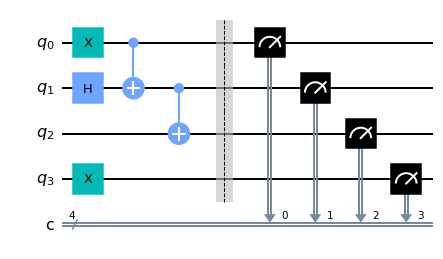

In [3]:
qc = QuantumCircuit(4,4)
qc.x(0)
qc.h(1)
qc.cx(0,1)
qc.cx(1,2)
qc.x(3)
qc.barrier()
qc.measure(range(4), range(4))
qc.draw(output='mpl')

In [4]:
qubits = np.array([0, 1, 2, 3])
arr = []
for p in multiset_permutations(qubits):
    arr.append(p)

In [5]:
def gatecount(qc, transpiled_circuit):
    count = transpiled_circuit.count_ops()
    items = list(count.items())
    pieces = len(items)
    new_arrays = np.array_split(items, pieces)
    new_arrays
    for i in range(pieces):
        if(new_arrays[i][0][0] == 'cx'):
            cnotcount = int(new_arrays[i][0][1])
            
    #print('Gate Counts -')
    #print(json.dumps(count,indent=4))
    return cnotcount
    
def plothistogram(qc, job):
    fig = plot_histogram(job.result().get_counts())
    display(fig)

def run(qc, layout, computer, plot=0):
    if (computer == 0):
        backend = Aer.get_backend('qasm_simulator')
        
    else:
        provider = IBMQ.get_provider(hub='ibm-q', group='open')
        small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
        backend = least_busy(small_devices)
        
    transpiled_circuit = transpile(qc, backend, initial_layout=layout)
    #job = execute(qc, backend, shots = 1024)
    print("Quantum Computer in Use:", str(backend))
    #job_monitor(job)
    #device_result = job.result()
    
    if(plot==1):
        plothistogram(qc, job)
    
    cx = gatecount(qc, transpiled_circuit)
    
    return cx

In [6]:
designspace = np.zeros(len(arr), dtype='int')
for i in range(len(arr)):
    print("Iteration", i+1)
    designspace[i] = run(qc=qc, layout=arr[i], computer=1)

Iteration 1
Quantum Computer in Use: ibmq_belem
Iteration 2
Quantum Computer in Use: ibmq_belem
Iteration 3
Quantum Computer in Use: ibmq_belem
Iteration 4
Quantum Computer in Use: ibmq_belem
Iteration 5
Quantum Computer in Use: ibmq_belem
Iteration 6
Quantum Computer in Use: ibmq_belem
Iteration 7
Quantum Computer in Use: ibmq_belem
Iteration 8
Quantum Computer in Use: ibmq_belem
Iteration 9
Quantum Computer in Use: ibmq_belem
Iteration 10
Quantum Computer in Use: ibmq_belem
Iteration 11
Quantum Computer in Use: ibmq_belem
Iteration 12
Quantum Computer in Use: ibmq_belem
Iteration 13
Quantum Computer in Use: ibmq_belem
Iteration 14
Quantum Computer in Use: ibmq_belem
Iteration 15
Quantum Computer in Use: ibmq_belem
Iteration 16
Quantum Computer in Use: ibmq_belem
Iteration 17
Quantum Computer in Use: ibmq_belem
Iteration 18
Quantum Computer in Use: ibmq_belem
Iteration 19
Quantum Computer in Use: ibmq_belem
Iteration 20
Quantum Computer in Use: ibmq_quito
Iteration 21
Quantum Computer

Text(0, 0.5, 'CNOT Gate Count')

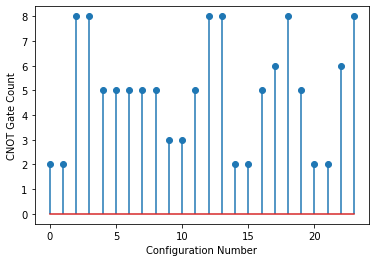

In [7]:
x = np.arange(0, len(arr))
plt.stem(x, designspace)
plt.xlabel("Configuration Number")
plt.ylabel("CNOT Gate Count")

In [8]:
print(designspace)
min = np.amin(designspace)
print("The minimum possible number of CNOT gates is", min)

[2 2 8 8 5 5 5 5 5 3 3 5 8 8 2 2 5 6 8 5 2 2 6 8]
The minimum possible number of CNOT gates is 2
